# HW 1

## Task 1

In [ ]:
txt_1 = "ABRACADABRA"
txt_2 = "BRICABRAC"
def get_2_shingles(text):
    result = set()
    for n in range(1, len(text)):
        result.add("".join((text[n-1],text[n])))
    return result
#a)
txt_1_shingles = get_2_shingles(txt_1)
#b)
txt_2_shingles = get_2_shingles(txt_2)
#c)
inter = txt_1_shingles.intersection(txt_2_shingles)
#d)
def jacard_distance(set1, set2):
    return round(len(set1.intersection(set2)) / len(set1.union(set2)),4)
print(f"a) {txt_1} contains the shingles: {txt_1_shingles}")
print(f"b) {txt_2} contains the shingles: {txt_2_shingles}")
print(f"c) Intersection between both: {inter}")
print(f"d) Jaccard distance: Ratio between intersection (set.intersection {len(inter)})" 
      f"and union (set.union {len(txt_1_shingles.union(txt_2_shingles))}):"
      f"{jacard_distance(txt_1_shingles,txt_2_shingles)}") 


a) ABRACADABRA contains the shingles: {'RA', 'CA', 'BR', 'DA', 'AD', 'AB', 'AC'}
b) BRICABRAC contains the shingles: {'RI', 'RA', 'CA', 'IC', 'BR', 'AB', 'AC'}
c) Intersection between both: {'RA', 'CA', 'BR', 'AB', 'AC'}
d) Jaccard distance: Ratio between intersection (set.intersection 5)and union (set.union 9):0.5556


## Task 2

### a)

In [ ]:
import numpy as np
char = np.asarray(
    [[0,1,1,0],
     [1,0,1,1],
     [0,1,0,1],
     [0,0,1,0],
     [1,0,1,0],
     [0,1,0,0]
    ])
perm_1 = np.asarray([4,5,0,2,3,1]).T
perm_2 = np.asarray([3,1,0,5,2,4]).T
print("Original matrix: ","\n" ,char)

def reorder_char(matrix, perm):
    if matrix.shape[0] != perm.shape[0]:
        raise Exception("Matrix and permutation sequence have different dimensions")
        return None
    to_return = np.zeros(shape = matrix.shape)
    for i,j in enumerate(perm):
        to_return[i] = matrix[j]
    return to_return

def hash_set(reordered_matrix, element=1):
    return [np.nonzero(instance == element)[0][0] for instance in reordered_matrix.T]
        

print(f"Hash of matrix with perm {perm_1}: {hash_set(reorder_char(char, perm_1))}")
print(f"Hash of matrix with perm {perm_2}: {hash_set(reorder_char(char, perm_2))}")


Original matrix:  
 [[0 1 1 0]
 [1 0 1 1]
 [0 1 0 1]
 [0 0 1 0]
 [1 0 1 0]
 [0 1 0 0]]
Hash of matrix with perm [4 5 0 2 3 1]: [0, 1, 0, 3]
Hash of matrix with perm [3 1 0 5 2 4]: [1, 2, 0, 1]


### b)  
Per our definition, a permutation is a bijection. Bijections must fulfill all of these requirements (cf Wikipedia):
- each element of X must be paired with at least one element of Y,
- no element of X may be paired with more than one element of Y,
- each element of Y must be paired with at least one element of X, and
- no element of Y may be paired with more than one element of X.

It is very quickly apparent that the last one is an issue for all hash functions containing a modulo as we have infinitely many options as to which numer created our hash, similiarly, there is only a very limited set of 6 numbers in our set, which may be enough for this example but limits us further if we add another row. 


In [ ]:
char = np.asarray(
    [
        [0,1,0,1],
        [0,0,0,1],
        [1,1,0,0],
        [0,0,1,0],
        [0,1,1,0],
        [1,0,0,0],
        [1,0,1,0],
    ])
h1 = lambda x : (2 * x + 1) % 7
h2 = lambda x : (3 * x + 2) % 7
h3 = lambda x : (5 * x + 2) % 7
hashfuncs = [h1,h2,h3]
def sig_matrix(chars, hashfuncs, element = 1):
    sig = np.full((len(hashfuncs),chars.shape[1]), np.inf)
    for i_row, row in enumerate(chars):
        idx = np.where(row == element)[0]
        for c in idx:
            for i, func in enumerate(hashfuncs):
                sig[i][c] = min(sig[i][c], func(i_row))
    return sig
sig_mat = sig_matrix(char,hashfuncs)

def jacard_sim(char_mat):
    import math
    sets = [t for t in char_mat.T]
    sims = []
    for i in range(len(sets)):
        for j in range(len(sets)):
            if i == j or j < i:
                continue
            intersection = np.logical_and(sets[i], sets[j])
            union = np.logical_or(sets[i], sets[j])
            sims.append(intersection.sum() / float(union.sum()))
    return sims

#print(sig_mat.T[i])
print("Original Char Matrix")
print(char)
print("sig_matrix")
print(sig_mat)
print(f"Estimated Sim: \n{jacard_sim(sig_mat)} \nvs actual Sim: \n{jacard_sim(char)}")

Original Char Matrix
[[0 1 0 1]
 [0 0 0 1]
 [1 1 0 0]
 [0 0 1 0]
 [0 1 1 0]
 [1 0 0 0]
 [1 0 1 0]]
sig_matrix
[[4. 1. 0. 1.]
 [1. 0. 0. 2.]
 [4. 1. 1. 0.]]
Estimated Sim: 
[0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.5, 0.3333333333333333, 0.0] 
vs actual Sim: 
[0.2, 0.2, 0.0, 0.2, 0.25, 0.0]


^ Check above, doesnt look right!
### d)   
Using hashfunctions means we work with a reduced representation of the sets s.    
In a permutation, we handle sets with  
 $s -> {0,1}^m$  
However, when using hashfunctions we use:
$h_i(S) -> {1,..,m}$ with length n 
with n < m (often n << m). This leads to a storage space reduction!

## Task 3

In [ ]:
sig = np.asarray([[1, 2, 1, 1, 2, 5, 4],
[2, 3, 4, 2, 3, 2, 2],
[3, 1, 2, 3, 1, 3, 2],
[4, 1, 3, 1, 2, 4, 4],
[5, 2, 5, 1, 1, 5, 1],
[6, 1, 6, 4, 1, 1, 4]])
bands = 3
rows = 2
display(sig)
def split_matrix(mat, bands, rows):
    t = np.vsplit(mat, bands)
    return t
splits = split_matrix(sig,bands,rows)
for s,t in enumerate(splits):
    t = t.T
    print(f"Band {s}")
    for i in range(len(t)):
        for j in range(i+1,len(t)):
            if np.all(t[i] == t[j]):
                print(f"{t[i]} at position {i} and {t[j]} at position {j} are a candidate pair")
    


array([[1, 2, 1, 1, 2, 5, 4],
       [2, 3, 4, 2, 3, 2, 2],
       [3, 1, 2, 3, 1, 3, 2],
       [4, 1, 3, 1, 2, 4, 4],
       [5, 2, 5, 1, 1, 5, 1],
       [6, 1, 6, 4, 1, 1, 4]])

Band 0
[1 2] at position 0 and [1 2] at position 3 are a candidate pair
[2 3] at position 1 and [2 3] at position 4 are a candidate pair
Band 1
[3 4] at position 0 and [3 4] at position 5 are a candidate pair
Band 2
[5 6] at position 0 and [5 6] at position 2 are a candidate pair
[1 4] at position 3 and [1 4] at position 6 are a candidate pair


First, the Signature Matrix must be divided into b bands with r rows each. In this case, b = 3 and r = 2. Now,  for each band seperately, we compare the signatures for the rows contained in this band. Each matching pair of entries is a candidate pair.  

## Task 4

We know that a r-way AND construction transforms a $(d_1, d_2, p_1, p_2)$-sensitive family H into a $(d_1, d_2, (p_1)^r), (p_2)^r$-sensitive family H'. A b-way OR construction transforms a $(d_1, d_2, p_1, p_2)$-sensitive family H into a $(d_1, d_2, 1-(1-p_1)^b, 1-(1-p_2)^b)$-sensitive family H'. For the given task we simply need to combine both, therefore <br>

1) transforms a $(d_1, d_2, p_1, p_2)$-sensitive family H into a $(d_1, d_2, 1-(1-(p_1)^2)^3, 1-(1-(p_2)^2)^3)$-sensitive family H' 

2) transforms a $(d_1, d_2, p_1, p_2)$-sensitive family H into a $(d_1, d_2, (1-(1-p_1)^3)^2, (1-(1-p_1)^3)^2)$-sensitive family H'

3) transforms a $(d_1, d_2, p_1, p_2)$-sensitive family H into a $(d_1, d_2, (1-(1-(p_1)^2)^2)^2, (1-(1-(p_2)^2)^2)^2)$-sensitive family H' 

4) transforms a $(d_1, d_2, p_1, p_2)$-sensitive family H into a $(d_1, d_2, (1-(1-(1-(1-p_1)^2)^2)^2)^2, (1-(1-(1-(1-p_1)^2)^2)^2)^2)$-sensitive family H'

[[1 2 1 1 2 5 4]
 [2 3 4 2 3 2 2]]
[[3 1 2 3 1 3 2]
 [4 1 3 1 2 4 4]]
[[5 2 5 1 1 5 1]
 [6 1 6 4 1 1 4]]


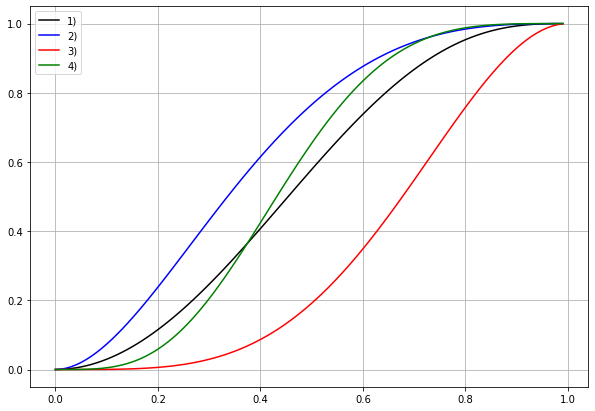

In [37]:
import matplotlib.pyplot as plt
import numpy as np

p = np.arange(0, 1, 0.01)

y1 = (1-(1-p**2)**3)
y2 = ((1-(1-p)**3)**2)
y3 = ((1-(1-(p)**2)**2)**2)
y4 = ((1-(1-(1-(1-p)**2)**2)**2)**2)
ys = [y1, y2, y3, y4]
cs = ["black", "blue", "red", "green"]

fig, ax = plt.subplots( figsize=(10, 7))

for y, c in zip(ys, cs):
  ax.plot(p, y, c)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid()
ax.legend(["1)", "2)", "3)", "4)"])

plt.show()